# Cohort Welcome Offer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cx_Oracle

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [15]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
df = pd.read_sql_query('''

 SELECT  
 	em.EM_ID,
 	to_date(em.EM_FECHA_ALTA) AS fecha_alta,
	to_date(min(ec_FECHA)) AS OrderDate,
--    ec.EC_CODIGO_PUBLICO AS OrderId,
    pro.PR_NOMBRE AS Product,
	ecd.ECD_PRECIO AS TotalCharges
from 
EMPLEO_ES.EMPRESAS_COMPRAS ec 
LEFT JOIN empleo_es.empresas_compras_detalles ecd ON ec.ec_id = ecd.ecd_compra
LEFT JOIN empleo_es.empresas_usuarios eu ON ec.EC_EMPRESA = eu.eu_id
LEFT JOIN empleo_Es.empresas_grupos eg ON eu.eu_grupo = eg.eg_id 
LEFT JOIN empleo_es.empresas_matrices em ON eg.eg_matriz = em.em_id
LEFT JOIN empleo_es.productos pro ON ecd.ECD_PRODUCTO = pro.pr_id
inner JOIN 
	(
		select num_compra, 
		to_date(fecha_imputacion, 'yyyymmdd') AS fecha_imputacion, 
		cod_canal_venta,
		sum(importe) importe
		from 
		DWHPRO.FACT_ENTERPRISE_SALES s
		LEFT JOIN DWHPRO.DIM_CANAL_VENTA dcv ON dcv.ID_CANAL_VENTA = s.id_canal_venta
		where fecha_imputacion >= '20180101' and 
        fecha_imputacion < '20190101'
		group by num_compra, fecha_imputacion, cod_canal_venta
		having sum(importe) > 0
    )s ON TO_CHAR(ec.EC_CODIGO_PUBLICO) = s.NUM_COMPRA 
 WHERE 
 	to_date(em.EM_FECHA_ALTA) >= TO_DATE('20180101','YYYYMMDD') 
 	AND to_date(em.EM_FECHA_ALTA) < TO_DATE('20190101','YYYYMMDD') 
    AND to_date(em.EM_FECHA_ALTA) <= to_date(s.fecha_imputacion)
 	--pro.PR_NOMBRE LIKE '%ferta%' 
 	--AND ecd.ECD_PRECIO/ecd.ECD_CANTIDAD = 49
 	--AND ec.EC_ESTADO = 1
 	--AND ecd.ECD_PRECIO > 0
GROUP BY 
 	em.EM_ID,
 	to_date(em.EM_FECHA_ALTA),
  --  ec.EC_CODIGO_PUBLICO,
    pro.PR_NOMBRE,
	ecd.ECD_PRECIO

''', con)
df_save = df
df

,EM_ID,FECHA_ALTA,ORDERDATE,PRODUCT,TOTALCHARGES
0,32599369218,2018-01-10,2018-01-10,Ampliacion a Oferta Estandar (Facade),69
1,32599564498,2018-01-10,2018-09-20,Executive Search Contacto - Pack 10 CV,0
2,32600380998,2018-01-10,2018-01-10,Oferta de empleo,0
3,32600739204,2018-01-10,2018-01-10,Ampliacion a Oferta Estandar (Facade),69
4,32600900034,2018-01-10,2018-02-28,Executive Search Contacto - Pack 10 CV,0
5,32601314964,2018-01-10,2018-01-11,Anuncio oficios,59
6,32601462270,2018-01-10,2018-01-18,Ampliacion a Oferta Estandar,69
7,32602134212,2018-01-10,2018-01-11,Oferta estandar,49
8,32602168434,2018-01-10,2018-01-10,Executive Search Contacto - Pack 10 CV,0
9,32602214942,2018-01-10,2018-01-10,Oferta estandar,69


In [16]:
df['CohortGroup'] = df['FECHA_ALTA'].apply(lambda x: x.strftime('%Y-%m'))

In [17]:
df['OrderPeriod'] = df['ORDERDATE'].apply(lambda x: x.strftime('%Y-%m'))

In [18]:
df.head()

,EM_ID,FECHA_ALTA,ORDERDATE,PRODUCT,TOTALCHARGES,CohortGroup,OrderPeriod
0,32599369218,2018-01-10,2018-01-10,Ampliacion a Oferta Estandar (Facade),69,2018-01,2018-01
1,32599564498,2018-01-10,2018-09-20,Executive Search Contacto - Pack 10 CV,0,2018-01,2018-09
2,32600380998,2018-01-10,2018-01-10,Oferta de empleo,0,2018-01,2018-01
3,32600739204,2018-01-10,2018-01-10,Ampliacion a Oferta Estandar (Facade),69,2018-01,2018-01
4,32600900034,2018-01-10,2018-02-28,Executive Search Contacto - Pack 10 CV,0,2018-01,2018-02


In [19]:

grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'EM_ID': pd.Series.nunique,
                       #'PRODUCT': pd.Series.count,
                       'TOTALCHARGES': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'EM_ID': 'TotalUsers'
                        #,'PRODUCT': 'TotalOrders'
                       }, inplace=True)
cohorts.head()

TotalUsers  TOTALCHARGES
CohortGroup OrderPeriod                          
2018-01     2018-01             701         69371
            2018-02             191         24052
            2018-03              84         11451
            2018-04              64         12219
            2018-05              60         11697

In [20]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  TOTALCHARGES  CohortPeriod
CohortGroup OrderPeriod                                        
2018-01     2018-01             701         69371             1
            2018-02             191         24052             2
            2018-03              84         11451             3
            2018-04              64         12219             4
            2018-05              60         11697             5

In [114]:
cohorts

OrderPeriod  TotalUsers  TOTALCHARGES
CohortGroup CohortPeriod                                      
2018-01     1                2018-01         701         69371
            2                2018-02         191         24052
            3                2018-03          84         11451
            4                2018-04          64         12219
            5                2018-05          60         11697
            6                2018-06          50         11625
            7                2018-07          44          8530
            8                2018-08          34          5574
            9                2018-09          49          6383
            10               2018-10          65          9736
            11               2018-11          55          9765
            12               2018-12          32          7359
2018-02     1                2018-02        1168        102575
            2                2018-03         182         22444
            3                2018-04          69         13691
            4                2018-05          69         14998
            5                2018-06          46          9499
            6                2018-07          40          9906
            7                2018-08          30          4758
            8                2018-09          49          7517
            9                2018-10          46          8627
            10               2018-11          49         10239
            11               2018-12          21          4233
2018-03     1                2018-03        1199        100079
            2                2018-04         194         20821
            3                2018-05          66         10073
            4                2018-06          77         12411
            5                2018-07          28          5302
            6                2018-08          35          6494
            7                2018-09          45          7563
...                              ...         ...           ...
2018-05     7                2018-11          49          8591
            8                2018-12          35          8573
2018-06     1                2018-06        1293         85832
            2                2018-07         172         13741
            3                2018-08          45          9207
            4                2018-09          74         10286
            5                2018-10          56         12436
            6                2018-11          49          7992
            7                2018-12          35          6260
2018-07     1                2018-07        1112         80340
            2                2018-08         131         13591
            3                2018-09          67          7979
            4                2018-10          50          9594
            5                2018-11          56          9422
            6                2018-12          30          5107
2018-08     1                2018-08         981         65394
            2                2018-09         131         13555
            3                2018-10          48          8639
            4                2018-11          42          8781
            5                2018-12          32          7085
2018-09     1                2018-09        1489         95609
            2                2018-10         156         15251
            3                2018-11          67         11525
            4                2018-12          37          4592
2018-10     1                2018-10        1419         92066
            2                2018-11         151         16089
            3                2018-12          38          7521
2018-11     1                2018-11        1342         87000
            2                2018-12          78          5717
2018-12     1                2018-12         839         51900

[78 rows x 3 columns]

In [92]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).sum()
cohort_group_size.head()

CohortGroup
2018-01    1429
2018-02    1769
2018-03    1763
2018-04    1904
2018-05    2125
Name: TotalUsers, dtype: int64

In [116]:
cohorts['TotalUsers'].head()

CohortGroup  CohortPeriod
2018-01      1               701
             2               191
             3                84
             4                64
             5                60
Name: TotalUsers, dtype: int64

In [115]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
CohortPeriod,,,,,,,,,,,,
1,701.0,1168.0,1199.0,1319.0,1615.0,1293.0,1112.0,981.0,1489.0,1419.0,1342.0,839.0
2,191.0,182.0,194.0,217.0,170.0,172.0,131.0,131.0,156.0,151.0,78.0,NaN
3,84.0,69.0,66.0,76.0,61.0,45.0,67.0,48.0,67.0,38.0,NaN,NaN
4,64.0,69.0,77.0,50.0,67.0,74.0,50.0,42.0,37.0,NaN,NaN,NaN
5,60.0,46.0,28.0,49.0,55.0,56.0,56.0,32.0,NaN,NaN,NaN,NaN


In [95]:
user_retention = cohorts['TotalUsers'].unstack(0)

In [96]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(12)

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
CohortPeriod,,,,,,,,,,,,
1,0.490553,0.660260,0.680091,0.692752,0.760000,0.750000,0.769018,0.794976,0.851344,0.882463,0.94507,1.0
2,0.133660,0.102883,0.110040,0.113971,0.080000,0.099768,0.090595,0.106159,0.089194,0.093905,0.05493,NaN
3,0.058782,0.039005,0.037436,0.039916,0.028706,0.026102,0.046335,0.038898,0.038308,0.023632,NaN,NaN
4,0.044787,0.039005,0.043676,0.026261,0.031529,0.042923,0.034578,0.034036,0.021155,NaN,NaN,NaN
5,0.041987,0.026003,0.015882,0.025735,0.025882,0.032483,0.038728,0.025932,NaN,NaN,NaN,NaN
6,0.034990,0.022612,0.019853,0.035189,0.034353,0.028422,0.020747,NaN,NaN,NaN,NaN,NaN
7,0.030791,0.016959,0.025525,0.025735,0.023059,0.020302,NaN,NaN,NaN,NaN,NaN,NaN
8,0.023793,0.027699,0.028361,0.028361,0.016471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.034290,0.026003,0.020420,0.012080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#user_retention = user_retention.head(30)

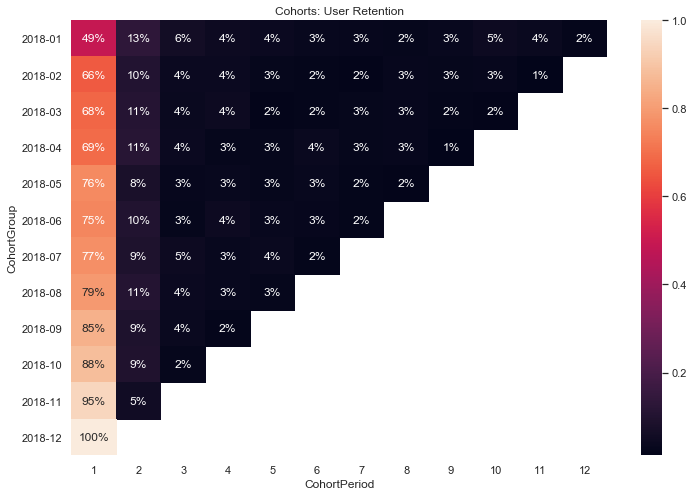

In [98]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='0.0%');

In [56]:
user_retention.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='CohortPeriod')

In [57]:
user_retention_2 = user_retention.loc[user_retention.index < 60]

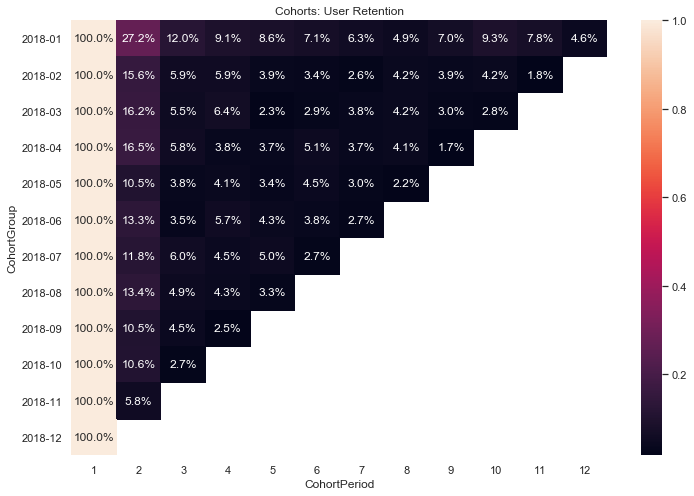

In [99]:
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_2.T, mask=user_retention_2.T.isnull(), annot=True, fmt='00.1%');

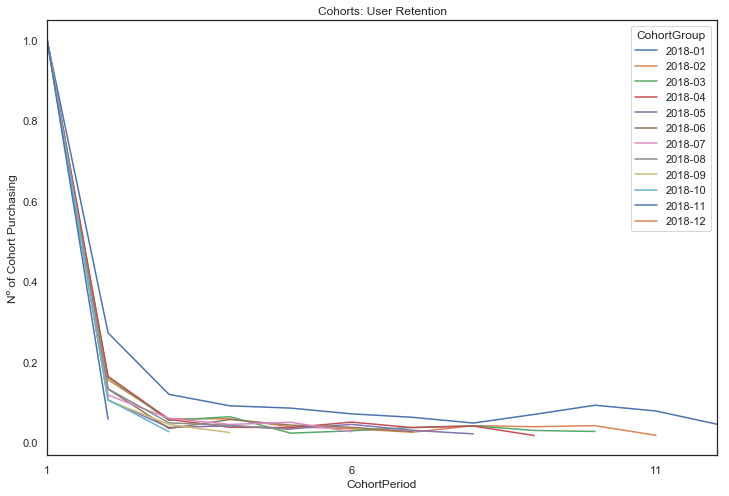

In [60]:
user_retention_2.plot(figsize=(12,8))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12, 5))
plt.xlim(1, 12)
plt.ylabel('Nº of Cohort Purchasing');

In [65]:
df['date_dif'] = (df['ORDERDATE'] - df['FECHA_ALTA']).dt.days

In [66]:
df.head()

,EM_ID,FECHA_ALTA,ORDERDATE,PRODUCT,TOTALCHARGES,CohortGroup,OrderPeriod,date_dif
0,32599369218,2018-01-10,2018-01-10,Ampliacion a Oferta Estandar (Facade),69,2018-01,2018-01,0
1,32599564498,2018-01-10,2018-09-20,Executive Search Contacto - Pack 10 CV,0,2018-01,2018-09,253
2,32600380998,2018-01-10,2018-01-10,Oferta de empleo,0,2018-01,2018-01,0
3,32600739204,2018-01-10,2018-01-10,Ampliacion a Oferta Estandar (Facade),69,2018-01,2018-01,0
4,32600900034,2018-01-10,2018-02-28,Executive Search Contacto - Pack 10 CV,0,2018-01,2018-02,49


### Ahora con la diferencia de fechas (f1-f2)

In [67]:

grouped = df.groupby(['CohortGroup', 'date_dif'])

# count the unique users, orders, and total revenue per Group + Period
cohorts_2 = grouped.agg({'EM_ID': pd.Series.nunique,
                       #'PRODUCT': pd.Series.count,
                       'TOTALCHARGES': np.sum})

# make the column names more meaningful
cohorts_2.rename(columns={'EM_ID': 'TotalUsers'
                          #,'PRODUCT': 'TotalOrders'
                         }, inplace=True)
cohorts_2.head()

TotalUsers  TOTALCHARGES
CohortGroup date_dif                          
2018-01     0                376         35947
            1                142         13704
            2                 31          3049
            3                 31          2657
            4                 16          1645

In [68]:
cohorts_2['TotalUsers'].unstack(0).head()

CohortGroup,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
date_dif,,,,,,,,,,,,
0,376.0,576.0,562.0,665.0,790.0,625.0,729.0,682.0,1072.0,1055.0,977.0,604.0
1,142.0,317.0,301.0,335.0,369.0,298.0,160.0,126.0,177.0,166.0,161.0,108.0
2,31.0,79.0,81.0,101.0,136.0,108.0,58.0,36.0,58.0,46.0,54.0,34.0
3,31.0,88.0,85.0,85.0,95.0,109.0,55.0,30.0,52.0,39.0,46.0,22.0
4,16.0,43.0,47.0,36.0,47.0,73.0,31.0,23.0,37.0,33.0,31.0,16.0


In [69]:
user_retention_3 = cohorts_2['TotalUsers'].unstack(0)

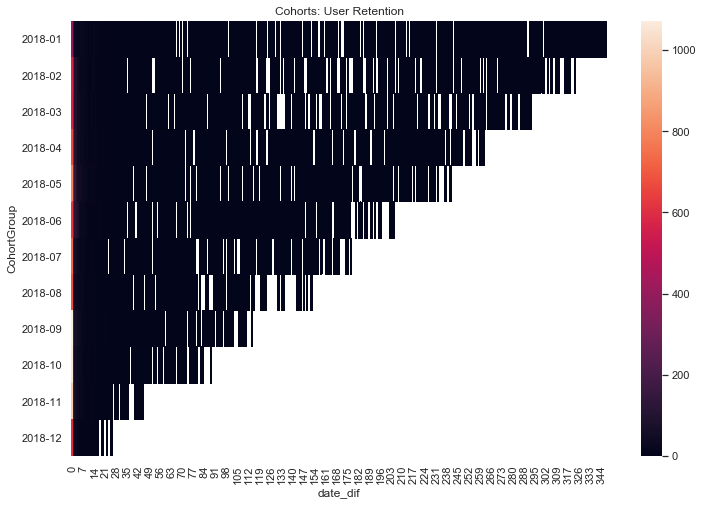

In [70]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_3.T, mask=user_retention_3.T.isnull(), annot=False);

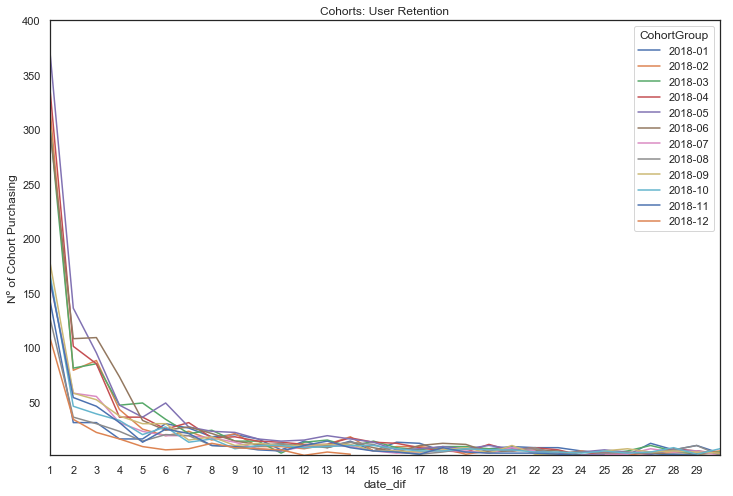

In [71]:
user_retention_3.plot(figsize=(12,8))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 30, 1))
plt.xlim(1, 30)
plt.ylim(1, 400)
plt.ylabel('Nº of Cohort Purchasing');

In [72]:
user_retention_3.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            335, 336, 337, 340, 341, 342, 344, 346, 350, 351],
           dtype='int64', name='date_dif', length=340)

In [73]:
user_retention_4 = user_retention_3.loc[user_retention.index < 60]

In [74]:
user_retention_5 = user_retention_4.loc[user_retention_4.index > 1]

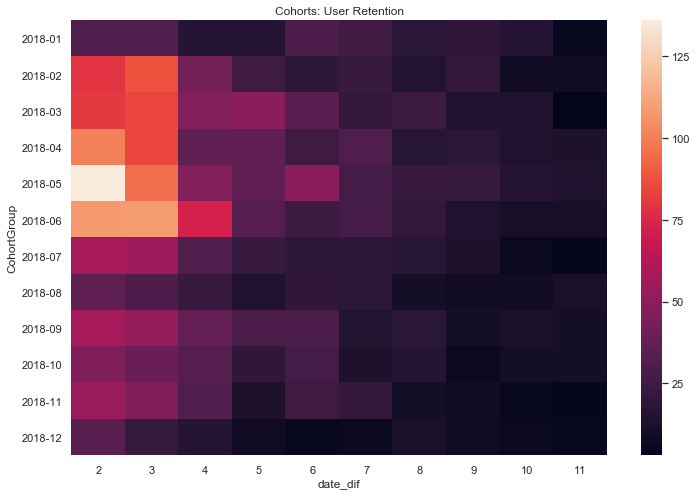

In [75]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_5.T, mask=user_retention_5.T.isnull(), annot=False);

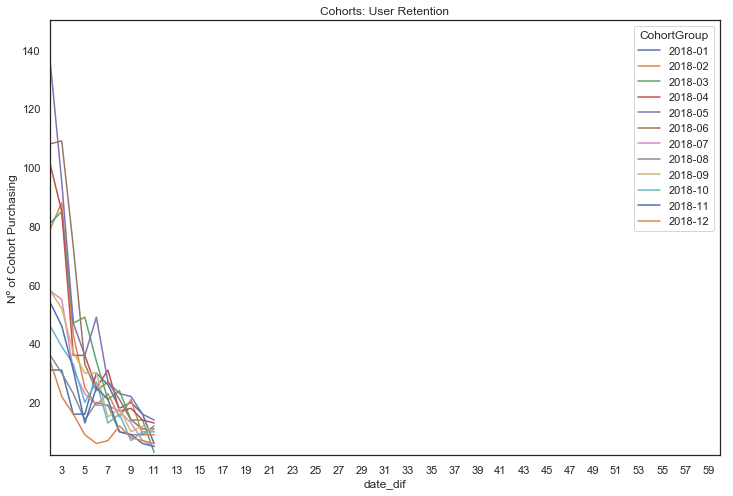

In [76]:
user_retention_5.plot(figsize=(12,8))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 60, 2))
plt.xlim(2, 60)
plt.ylim(2, 150)
plt.ylabel('Nº of Cohort Purchasing');